### Stock Price Prediction

In [4]:
!pip install yfinance

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [7]:
sp= yf.Ticker("SPOT")

In [8]:
sp_share = sp.history(period="max")

In [9]:
sp_share.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-03,165.899994,169.000000,148.259995,149.009995,30526500,0,0
2018-04-04,140.000000,148.929993,135.509995,144.220001,11702900,0,0
2018-04-05,149.229996,152.410004,141.250000,143.990005,7372800,0,0
2018-04-06,146.070007,148.729996,144.669998,147.919998,4228100,0,0
2018-04-09,149.500000,151.000000,148.589996,150.000000,2051400,0,0


In [10]:
sp_share.reset_index(inplace=True)

In [11]:
sp_share

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-04-03,165.899994,169.000000,148.259995,149.009995,30526500,0,0
1,2018-04-04,140.000000,148.929993,135.509995,144.220001,11702900,0,0
2,2018-04-05,149.229996,152.410004,141.250000,143.990005,7372800,0,0
3,2018-04-06,146.070007,148.729996,144.669998,147.919998,4228100,0,0
4,2018-04-09,149.500000,151.000000,148.589996,150.000000,2051400,0,0
...,...,...,...,...,...,...,...,...
917,2021-11-19,263.269989,266.910004,258.070007,259.549988,799500,0,0
918,2021-11-22,258.649994,264.135010,247.014999,250.339996,1346300,0,0
919,2021-11-23,246.229996,251.130005,237.059998,243.029999,2356700,0,0
920,2021-11-24,244.669998,251.585007,238.649994,249.490005,1552300,0,0


#### Making a graph

<AxesSubplot:title={'center':"Spotify's stock price"}, xlabel='Date'>

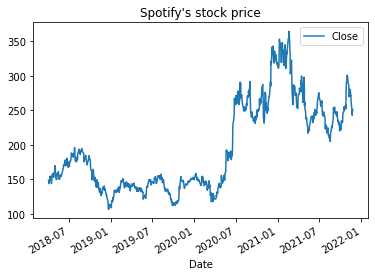

In [12]:
sp_share.plot(x="Date", y="Close", title="Spotify's stock price")

In [13]:
sp_share_monthly = sp_share.groupby(pd.Grouper(key='Date', freq='M'))['Close'].mean()
sp_share_monthly.head()

Date
2018-04-30    152.102001
2018-05-31    156.349092
2018-06-30    171.060476
2018-07-31    182.651906
2018-08-31    187.555218
Freq: M, Name: Close, dtype: float64

#### Predict stock price

In [29]:
days_for_calculation = 25
sp_share['Prediction']=sp_share[['Close']].shift(-days_for_calculation)
sp_share.head(27)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction
0,2018-04-03,165.899994,169.000000,148.259995,149.009995,30526500,0,0,150.639999
1,2018-04-04,140.000000,148.929993,135.509995,144.220001,11702900,0,0,150.070007
2,2018-04-05,149.229996,152.410004,141.250000,143.990005,7372800,0,0,158.130005
3,2018-04-06,146.070007,148.729996,144.669998,147.919998,4228100,0,0,156.770004
4,2018-04-09,149.500000,151.000000,148.589996,150.000000,2051400,0,0,159.970001
5,2018-04-10,152.000000,156.740005,151.132996,154.899994,2980000,0,0,158.710007
6,2018-04-11,154.000000,154.149994,147.500000,149.570007,1874000,0,0,161.389999
7,2018-04-12,150.250000,151.000000,148.649994,149.100006,1371900,0,0,158.759995
8,2018-04-13,149.800003,150.419998,148.050003,149.000000,1608100,0,0,150.800003
9,2018-04-16,150.000000,150.000000,142.740005,144.320007,1454700,0,0,150.220001


In [15]:
X=np.array(sp_share["Close"])[:-days_for_calculation]
X=X.reshape(-1,1)

#### Linear Regression

In [16]:
y= np.array(sp_share["Prediction"])[:-days_for_calculation]
y=y.reshape(-1,1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

In [18]:
LrModel=LinearRegression().fit(x_train, y_train)

In [19]:
y_pred=LrModel.predict(x_test)
lr_rmse=math.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse
lr_r2=r2_score(y_test,y_pred)
print("RMSE:",lr_rmse,"R2socre:",lr_r2)

RMSE: 28.094312589205487 R2socre: 0.8150369497311167


####  Decision Tree Regression

In [20]:
TreeModel=DecisionTreeRegressor().fit(x_train, y_train)

In [21]:
x_forecast=np.array(sp_share["Close"])[-days_for_calculation:]
x_forecast=x_forecast.reshape(-1,1)

In [22]:
lrPredict=LrModel.predict(x_forecast)

In [23]:
TreePredict=TreeModel.predict(x_forecast)

In [32]:
sp_future_share= sp_share[-days_for_calculation:]
lrPredict_flat=np.ndarray.flatten(lrPredict)
sp_future_share.loc[:,"LrPrediction"]=lrPredict_flat
sp_future_share.tail(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction,LrPrediction
919,2021-11-23,246.229996,251.130005,237.059998,243.029999,2356700,0,0,NaN,241.881969
920,2021-11-24,244.669998,251.585007,238.649994,249.490005,1552300,0,0,NaN,247.746807
921,2021-11-26,248.080002,253.050003,246.050003,250.889999,836900,0,0,NaN,249.017818


In [34]:
TreePredict_flat=np.ndarray.flatten(TreePredict)
sp_future_share.loc[:,"TreePrediction"]=TreePredict_flat
sp_future_share.tail(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction,LrPrediction,TreePrediction
919,2021-11-23,246.229996,251.130005,237.059998,243.029999,2356700,0,0,NaN,241.881969,251.179993
920,2021-11-24,244.669998,251.585007,238.649994,249.490005,1552300,0,0,NaN,247.746807,247.779999
921,2021-11-26,248.080002,253.050003,246.050003,250.889999,836900,0,0,NaN,249.017818,239.339996


#### Make a graph with prediction 

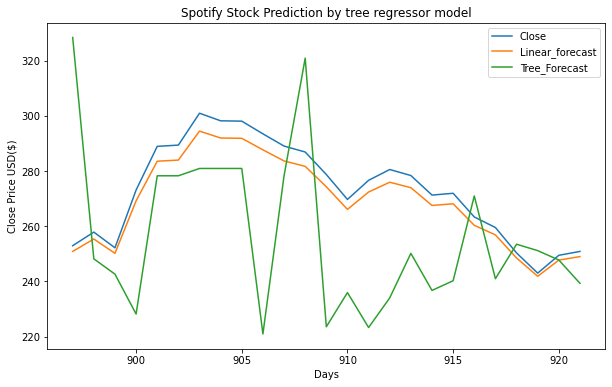

In [35]:
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by tree regressor model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(sp_future_share[["Close","LrPrediction","TreePrediction"]] )
plt.legend(["Close", "Linear_forecast","Tree_Forecast"])
plt.show()

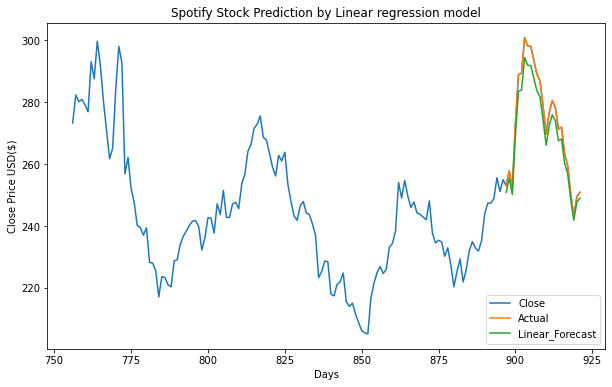

In [36]:
sp_share_plot = sp_share[sp_share.Date>"2021-04-01"]
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by Linear regression model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(sp_share_plot[["Close"]])
plt.plot(sp_future_share[["Close","LrPrediction"]])
plt.legend(["Close","Actual","Linear_Forecast"])
plt.show()

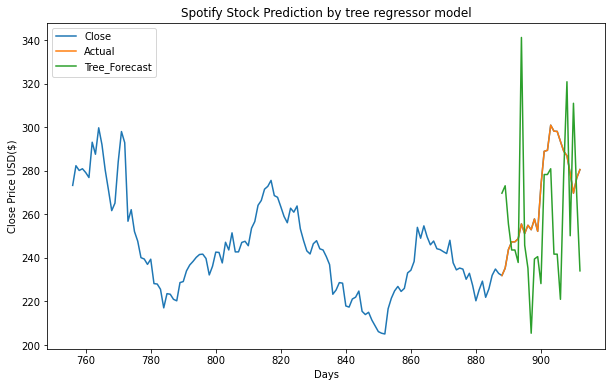

In [34]:
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by tree regressor model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(sp_share_plot[["Close"]])
plt.plot(sp_future_share[["Close","TreePrediction"]])
plt.legend(["Close","Actual","Tree_Forecast"])
plt.show()

#### Reference 

https://thecleverprogrammer.com/2020/05/11/stock-price-prediction-with-machine-learning/
https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/

https://www.youtube.com/watch?v=QIUxPv5PJOY

https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b